In [1]:
from bs4 import BeautifulSoup
import requests
from time import sleep
from collections import *
import matplotlib.pyplot as plt

## Baixando informações do site

In [2]:
url = 'https://ssearch.oreilly.com/?i=1;page=1;q=data&act=pg_1'
html = requests.get(url).text

soup = BeautifulSoup(html, 'html5lib')

## Encontrando todos as entradas de livros e suas informações

Até o momento dese notebook, cada livro está em um elemento < article class:"result product-result">

As informações dos livros então dentro de < div class:'book_text'>

In [3]:
#Encontrando os livros
articles = soup('article', 'result product-result')
books_info = [article.find('div', 'book_text') for article in articles]

#Coletando o nome dos livros
titles = [infos.find('p','title').text for infos in books_info]

#Coletando o nome dos autores
author_name = [infos.find('p','note').text for infos in books_info]

#Coletando ano de publicação
publ_date_raw = [infos.find('p','note date2').text.replace('\n','') for infos in books_info]
publ_date = [[int(s) for s in val.split() if s.isdigit()] for val in publ_date_raw]

## Colocando tudo em uma função

In [4]:
def info_extract(article):
    title = article.find('p','title').text.strip()
    author_name = article.find('p','note').text
    publ_date_raw = article.find('p','note date2').text.replace('\n','')
    publ_date = [int(s) for s in publ_date_raw.split() if s.isdigit()]
    
    return{
        "title": title,
        "author": author_name,
        "date": publ_date
    }

## Coletando informação de todas as páginas do site

In [7]:
base_url = "https://ssearch.oreilly.com/?i=1;q=data&act=pg_190;page="
books = []

NUM_PAGES = 352 #O valor real em Fev/2020 era 352

for page_num in range(1,NUM_PAGES+1):
    print("Página Atual:",page_num, "|",len(books),"livros encontrados até agora.")
    url = base_url + str(page_num)
    soup = BeautifulSoup(requests.get(url).text, 'html5lib')
    
    for article in soup('article', 'result product-result'):
        books.append(info_extract(article))

Página Atual: 1 | 0 livros encontrados até agora.
Página Atual: 2 | 3 livros encontrados até agora.
Página Atual: 3 | 5 livros encontrados até agora.
Página Atual: 4 | 6 livros encontrados até agora.
Página Atual: 5 | 6 livros encontrados até agora.
Página Atual: 6 | 10 livros encontrados até agora.
Página Atual: 7 | 13 livros encontrados até agora.
Página Atual: 8 | 28 livros encontrados até agora.
Página Atual: 9 | 44 livros encontrados até agora.
Página Atual: 10 | 60 livros encontrados até agora.
Página Atual: 11 | 75 livros encontrados até agora.
Página Atual: 12 | 91 livros encontrados até agora.
Página Atual: 13 | 106 livros encontrados até agora.
Página Atual: 14 | 119 livros encontrados até agora.
Página Atual: 15 | 131 livros encontrados até agora.
Página Atual: 16 | 147 livros encontrados até agora.
Página Atual: 17 | 163 livros encontrados até agora.
Página Atual: 18 | 179 livros encontrados até agora.
Página Atual: 19 | 195 livros encontrados até agora.
Página Atual: 20 | 

Página Atual: 156 | 756 livros encontrados até agora.
Página Atual: 157 | 772 livros encontrados até agora.
Página Atual: 158 | 788 livros encontrados até agora.
Página Atual: 159 | 804 livros encontrados até agora.
Página Atual: 160 | 820 livros encontrados até agora.
Página Atual: 161 | 836 livros encontrados até agora.
Página Atual: 162 | 850 livros encontrados até agora.
Página Atual: 163 | 866 livros encontrados até agora.
Página Atual: 164 | 882 livros encontrados até agora.
Página Atual: 165 | 895 livros encontrados até agora.
Página Atual: 166 | 895 livros encontrados até agora.
Página Atual: 167 | 895 livros encontrados até agora.
Página Atual: 168 | 895 livros encontrados até agora.
Página Atual: 169 | 895 livros encontrados até agora.
Página Atual: 170 | 895 livros encontrados até agora.
Página Atual: 171 | 895 livros encontrados até agora.
Página Atual: 172 | 901 livros encontrados até agora.
Página Atual: 173 | 917 livros encontrados até agora.
Página Atual: 174 | 933 livr

Página Atual: 306 | 2010 livros encontrados até agora.
Página Atual: 307 | 2010 livros encontrados até agora.
Página Atual: 308 | 2010 livros encontrados até agora.
Página Atual: 309 | 2010 livros encontrados até agora.
Página Atual: 310 | 2010 livros encontrados até agora.
Página Atual: 311 | 2010 livros encontrados até agora.
Página Atual: 312 | 2010 livros encontrados até agora.
Página Atual: 313 | 2010 livros encontrados até agora.
Página Atual: 314 | 2010 livros encontrados até agora.
Página Atual: 315 | 2010 livros encontrados até agora.
Página Atual: 316 | 2010 livros encontrados até agora.
Página Atual: 317 | 2010 livros encontrados até agora.
Página Atual: 318 | 2010 livros encontrados até agora.
Página Atual: 319 | 2010 livros encontrados até agora.
Página Atual: 320 | 2010 livros encontrados até agora.
Página Atual: 321 | 2012 livros encontrados até agora.
Página Atual: 322 | 2028 livros encontrados até agora.
Página Atual: 323 | 2044 livros encontrados até agora.
Página Atu

## Número de livros publicados por ano

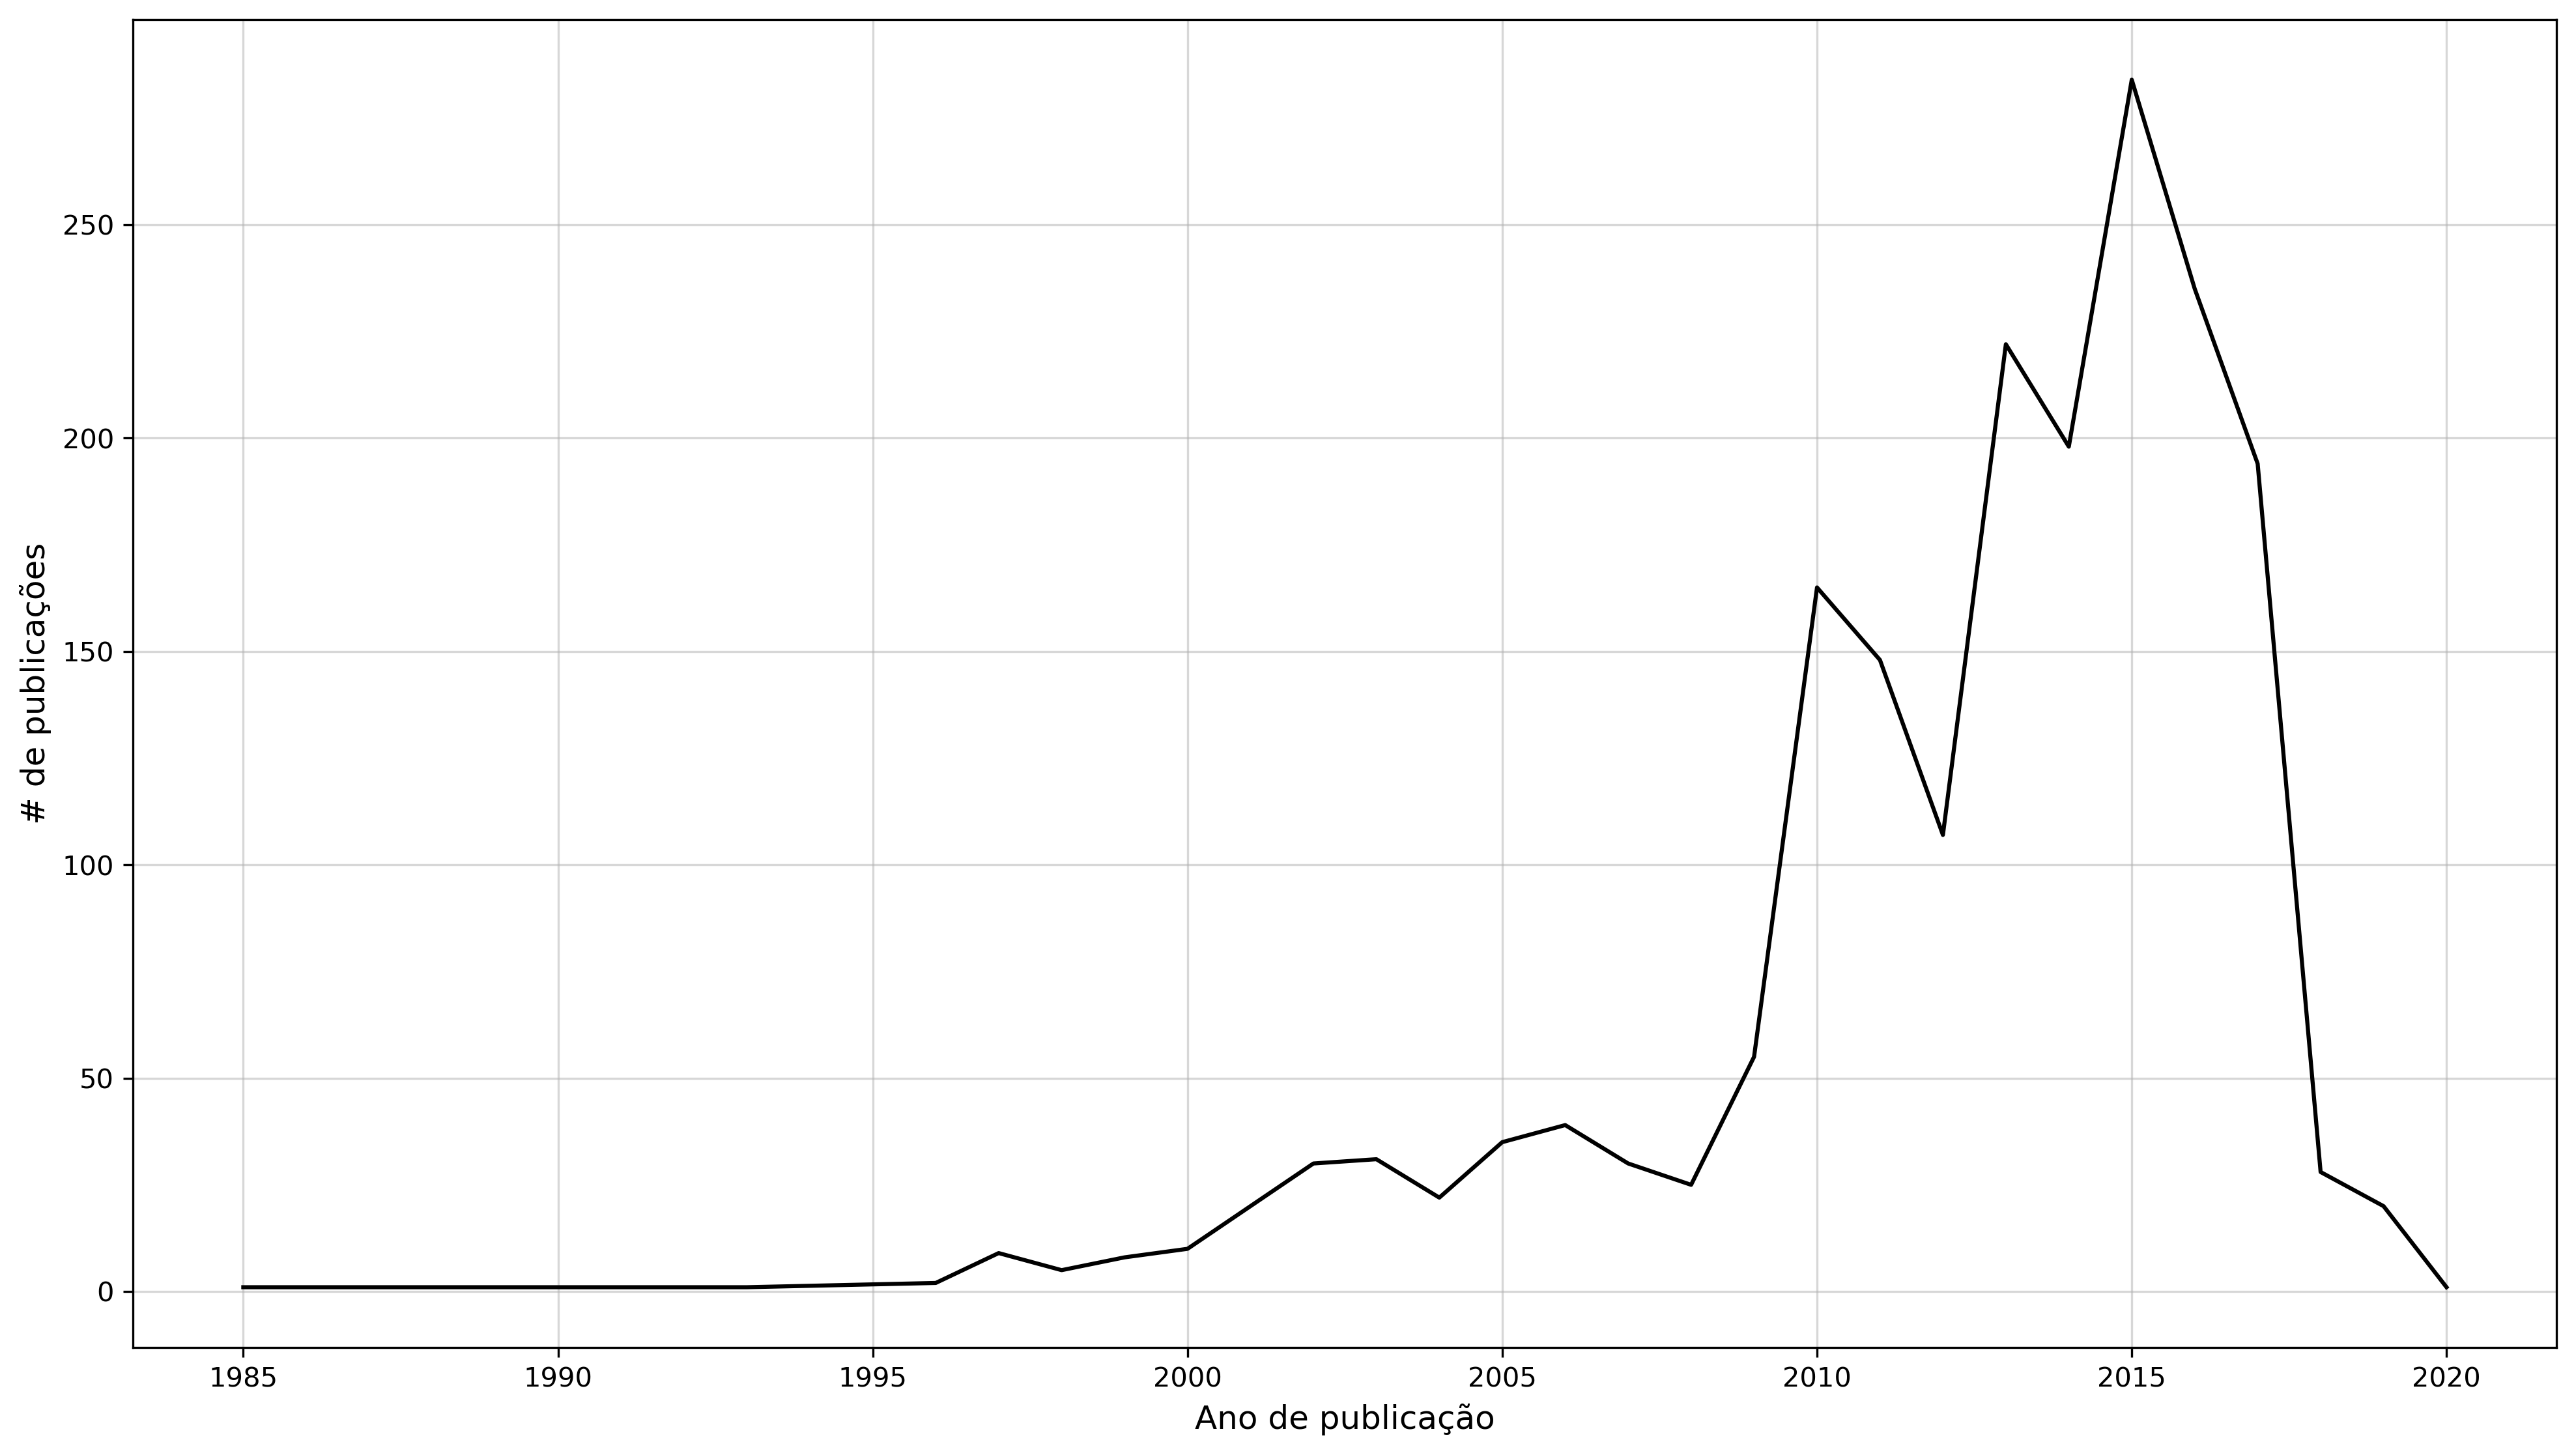

In [9]:
dates = [books[i]["date"] for i in range(len(books)) if books[i]["date"] != []]
dates_count = Counter([val for sublist in dates for val in sublist])

dates_sorted = sorted(dates_count)
book_count   = [dates_count[date] for date in dates_sorted]

plt.figure(figsize = (16,9), dpi = 300)
plt.plot(dates_sorted, book_count, "-k")
plt.grid(alpha = 0.5)
plt.xlabel("Ano de publicação", size = 12)
plt.ylabel("# de publicações", size = 12)
plt.show()